# Set up

**Importing packages**

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sqlite3 import Error

**Mount Google Drive**

In [ ]:
# Mount google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Set the location of your CSV file**

In [ ]:
# this is my directory, don't forget to switch to your own directory
file_path = '/content/drive/My Drive/Project 1/BirdStrikesData-1.csv'

**Set the location of your desired sqlite3 database file**

In [ ]:
# Location of your desired sqlite3 database file, don't forget to switch
# to your own path
db_file_path = '/content/drive/My Drive/Project 1/birdstrikes.db'

# Data cleaning

**Load csv file**

In [ ]:

# load the csv file
df = pd.read_csv(file_path, keep_default_na=False, na_values=['N/A',''])


**Standarlize the column names**

In [ ]:
# standarlize the column names

# define a function to delete :, /, ?, $,
# remove any leading or trailing whitespace from the column names
# replace ' ' with _
# set all letteres to lowercase
def clean_column_names(columns):
    cleaned_columns = columns.str.replace(':', '', regex=False) \
                             .str.replace('/', '', regex=False) \
                             .str.replace('?', '', regex=False) \
                             .str.replace('$', '', regex=False) \
                             .str.strip() \
                             .str.replace(' ', "_", regex=False) \
                             .str.lower()
    return cleaned_columns

df.columns = clean_column_names(df.columns)


**Check data types for all columns**

In [ ]:
# Display the data types of all columns
print("Data types before specifying:")
print(df.dtypes)

Data types before specifying:
record_id                                   int64
aircraft_type                              object
airport_name                               object
altitude_bin                               object
aircraft_makemodel                         object
wildlife_number_struck                     object
wildlife_number_struck_actual               int64
effect_impact_to_flight                    object
flightdate                                 object
effect_indicated_damage                    object
aircraft_number_of_engines                 object
aircraft_airlineoperator                   object
origin_state                               object
when_phase_of_flight                       object
conditions_precipitation                   object
remains_of_wildlife_collected                bool
remains_of_wildlife_sent_to_smithsonian      bool
remarks                                    object
wildlife_size                              object
conditions_sky      

In [ ]:
from IPython.display import display

# Print the cleaned column names to check
print("First few rows of the DataFrame:")
display(df.head())

First few rows of the DataFrame:


,record_id,aircraft_type,airport_name,altitude_bin,aircraft_makemodel,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,...,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/2000 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,7/25/2001 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,9/14/2001 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/2002 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,6/23/2003 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


**Display unique values in a column to check outliers**

In [ ]:
# Function to display unique values in specified column
def display_unique_values(dataframe, column=None):
    if column:
        if column in dataframe.columns:
            unique_values = dataframe[column].unique()
            print(f"Column: {column}")
            print(f"Unique Values ({len(unique_values)}): {unique_values[:10]}")  # Display only first 10 unique values for brevity
            print("\n")
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")
    else:
        for col in dataframe.columns:
            unique_values = dataframe[col].unique()
            print(f"Column: {col}")
            print(f"Unique Values ({len(unique_values)}): {unique_values[:10]}")  # Display only first 10 unique values for brevity
            print("\n")


# Display unique values for a specific column
# display_unique_values(df, 'airport_name')

# Display unique values for all columns
display_unique_values(df)

Column: record_id
Unique Values (25558): [202152 208159 207601 215953 219878 218432 221697 236635 207369 204371]


Column: aircraft_type
Unique Values (2): ['Airplane' nan]


Column: airport_name
Unique Values (1110): ['LAGUARDIA NY' 'DALLAS/FORT WORTH INTL ARPT' 'LAKEFRONT AIRPORT'
 'SEATTLE-TACOMA INTL' 'NORFOLK INTL' 'GUAYAQUIL/S BOLIVAR'
 'NEW CASTLE COUNTY' 'WASHINGTON DULLES INTL ARPT' 'ATLANTA INTL'
 'ORLANDO SANFORD INTL AIRPORT']


Column: altitude_bin
Unique Values (3): ['> 1000 ft' '< 1000 ft' nan]


Column: aircraft_makemodel
Unique Values (351): ['B-737-400' 'MD-80' 'C-500' 'CL-RJ100/200' 'A-300' 'LEARJET-25' 'A-320'
 'DC-9-30' 'A-330' 'FOKKER F100']


Column: wildlife_number_struck
Unique Values (5): ['Over 100' '2 to 10' nan '11 to 100' '1']


Column: wildlife_number_struck_actual
Unique Values (106): [859 424 261 806 942 537 227 320   9   4]


Column: effect_impact_to_flight
Unique Values (6): ['Engine Shut Down' 'None' 'Precautionary Landing' 'Other'
 'Aborted Take-off

**Delete rows with missing values for columns that should not contain null values**

In [ ]:

# Delete rows with missing values for columns that should not contain null values

# Replace empty strings with NaN (specifically for the purpose of identifying and removing them)
# df.replace('', pd.NA, inplace=True)
df.replace({'': pd.NA, 'N/A': pd.NA}, inplace=True)

# Define the list of essential columns that should not have null values
essential_columns = ['aircraft_type', 'airport_name', 'flightdate', 'aircraft_airlineoperator',
    'origin_state', 'when_phase_of_flight', 'conditions_precipitation', 'effect_impact_to_flight',
    'feet_above_ground', 'aircraft_number_of_engines']

# Drop rows with null values in any of the essential columns
df = df.dropna(subset=essential_columns)

# Drop rows with value C for aircraft_number_of_engines
df = df[df['aircraft_number_of_engines'] != 'C']


**Check columns with empty values after deleting**

In [ ]:
# Identify columns with empty (NaN) values
columns_with_na = df.columns[df.isna().any()].tolist()

# Output the names of the columns with empty values
print("Columns with empty values:", columns_with_na)

Columns with empty values: ['remarks']


**Convert each column to the correct data type**

In [ ]:

# Convert to correct data types
df['aircraft_number_of_engines'] = df['aircraft_number_of_engines'].astype('int64')
df['pilot_warned_of_birds_or_wildlife'] = df['pilot_warned_of_birds_or_wildlife'].map({'Y': True, 'N': False}).astype('bool')
# df['feet_above_ground'] = pd.to_numeric(df['feet_above_ground'].astype(str).str.replace(',', ''), errors='coerce').astype('Int64')
df['feet_above_ground'] = df['feet_above_ground'].astype(str).str.replace(',', '')
df['feet_above_ground'] = pd.to_numeric(df['feet_above_ground']).astype('int64')
df['is_aircraft_large'] = df['is_aircraft_large'].map({'Yes': True, 'No': False}).astype('bool')

# Convert 'FlightDate' to datetime
df['flightdate'] = pd.to_datetime(df['flightdate'], format='%m/%d/%Y %H:%M', errors='coerce').astype('string')

# Convert 'Cost: Total $' to numeric, handling errors
df['cost_total'] = pd.to_numeric(df['cost_total'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce').astype('Int64')
# Display the data types of all columns after specifying
print("\nData types after specifying:")
print(df.dtypes)


Data types after specifying:
record_id                                           int64
aircraft_type                                      object
airport_name                                       object
altitude_bin                                       object
aircraft_makemodel                                 object
wildlife_number_struck                             object
wildlife_number_struck_actual                       int64
effect_impact_to_flight                            object
flightdate                                 string[python]
effect_indicated_damage                            object
aircraft_number_of_engines                          int64
aircraft_airlineoperator                           object
origin_state                                       object
when_phase_of_flight                               object
conditions_precipitation                           object
remains_of_wildlife_collected                        bool
remains_of_wildlife_sent_to_smithsonian   

In [ ]:
df.head()

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_makemodel,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,...,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,False,30736,1500,0,True
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,True,0,0,0,False
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,False,0,50,0,False
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,True,0,50,0,True
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,False,0,50,0,False


In [ ]:
# Check 'Feet above ground' only contains non-negative values
all_positive_integers = (df['feet_above_ground'] >= 0).all()

print("\nDoes 'Feet above ground' column contain only positive integers? ", all_positive_integers)




Does 'Feet above ground' column contain only positive integers?  True


**Check if the record size in wildlife_size and wildlife_species matches**

In [ ]:
# Check if the record size in wildlife_size and wildlife_species matches
# Function to extract size from wildlife_species
def extract_size(species):
    if pd.isna(species):
        return None
    parts = species.split(' - ')
    if len(parts) > 1:
        return parts[-1].strip()
    return None

# Apply the function to extract size
df['extracted_size'] = df['wildlife_species'].apply(extract_size)
df['wildlife_size'] = df['wildlife_size'].str.lower()

# Compare extracted_size with Wildlife: Size and find discrepancies
discrepancies = df[(df['extracted_size'].notna()) & (df['wildlife_size'].notna()) & (df['extracted_size'] != df['wildlife_size'])]

# Print the rows with discrepancies
print("Rows with discrepancies between 'Wildlife: Species' and 'Wildlife: Size':")
print(discrepancies[['wildlife_species', 'wildlife_size', 'extracted_size']])

Rows with discrepancies between 'Wildlife: Species' and 'Wildlife: Size':
           wildlife_species wildlife_size extracted_size
4939  Unknown bird - medium         large         medium


In [ ]:
# Remove rows with discrepancies
df = df.drop(discrepancies.index)

**For each unique aircraft model, make sure model - engine_number - is_large is consistant**

**Check for each unique model, is there various  sizes**

In [ ]:
# Group by 'aircraft_makemodel' and count the unique values of 's_aircraft_large'
size_count_per_model = df.groupby('aircraft_makemodel')['is_aircraft_large'].nunique().reset_index()

# Filter to find models with more than one unique size
models_with_multiple_sizes = size_count_per_model[size_count_per_model['is_aircraft_large'] > 1]

# Print the models with multiple sizes
print("Models with multiple size:")
print(models_with_multiple_sizes)


Models with multiple size:
Empty DataFrame
Columns: [aircraft_makemodel, is_aircraft_large]
Index: []


**Check for each unique model, is there various number of engines**

In [ ]:
# Group by 'aircraft_makemodel' and count the unique values of 'aircraft_number_of_engines'
engine_count_per_model = df.groupby('aircraft_makemodel')['aircraft_number_of_engines'].nunique().reset_index()

# Filter to find models with more than one unique engine number
models_with_multiple_engines = engine_count_per_model[engine_count_per_model['aircraft_number_of_engines'] > 1]

# Print the models with multiple engine numbers
print("Models with multiple engine numbers:")
print(models_with_multiple_engines)


Models with multiple engine numbers:
  aircraft_makemodel  aircraft_number_of_engines
0              A-300                           2


**For a model with various number of engines, drow the rows to make the number of engines unique**

In [ ]:
# Filter the rows for 'A-300' and get the unique engine numbers
a300_engine_numbers = df[df['aircraft_makemodel'] == 'A-300']['aircraft_number_of_engines'].unique()

print("A-300 engine numbers: ")
print(a300_engine_numbers)

# Find the row numbers where 'aircraft_makemodel' is 'A-300' and 'aircraft_number_of_engines' is 4
rows_to_delete = df[(df['aircraft_makemodel'] == 'A-300') & (df['aircraft_number_of_engines'] == 4)].index.tolist()

print("Rows to delete:")
print(rows_to_delete)

# Delete the rows
df = df.drop(rows_to_delete)

# Check if the model and number of engines are consistant after deleting
engine_count_per_model_deleted = df.groupby('aircraft_makemodel')['aircraft_number_of_engines'].nunique().reset_index()

# Filter to find models with more than one unique engine number
models_with_multiple_engines_deleted = engine_count_per_model_deleted[engine_count_per_model_deleted['aircraft_number_of_engines'] > 1]
print("Models with multiple engine numbers after deleting:")
print(models_with_multiple_engines_deleted)



A-300 engine numbers: 
[2 4]
Rows to delete:
[17031]
Models with multiple engine numbers after deleting:
Empty DataFrame
Columns: [aircraft_makemodel, aircraft_number_of_engines]
Index: []


# Data Loading

**Define class for data loading**

In [ ]:
class BirdStrikesDataLoader:
    SQL_SELECT_BIRD = '''
    SELECT bird_id FROM bird WHERE size = ? AND species = ?
    '''

    SQL_INSERT_BIRD = '''
    INSERT INTO bird (size, species) VALUES (?, ?)
    '''

    SQL_SELECT_WEATHER_CONDITION = '''
    SELECT wc_id FROM weather_condition WHERE sky = ? AND precipitation = ?
    '''

    SQL_INSERT_WEATHER_CONDITION = '''
    INSERT INTO weather_condition (sky, precipitation) VALUES (?, ?)
    '''

    SQL_SELECT_AIRPORT = '''
    SELECT airport_id FROM airport WHERE name = ? AND location_state = ?
    '''

    SQL_INSERT_AIRPORT = '''
    INSERT INTO airport(name, location_state) VALUES (?, ?)
    '''

    SQL_SELECT_AIRCRAFT_MODEL = '''
    SELECT aircraft_model_id FROM aircraft_model WHERE model = ? AND is_large = ? AND num_of_engines = ?
    '''

    SQL_INSERT_AIRCRAFT_MODEL = '''
    INSERT INTO aircraft_model(model, is_large, num_of_engines) VALUES (?, ?, ?)
    '''

    SQL_SELECT_AIRLINE = '''
    SELECT airline_id FROM airline WHERE airline_name = ?
    '''

    SQL_INSERT_AIRLINE = '''
    INSERT INTO airline(airline_name) VALUES (?)
    '''

    SQL_INSERT_FLIGHT = '''
    INSERT INTO flight(flight_date, airline_id, aircraft_model_id, origin_airport_id) VALUES (?, ?, ?, ?)
    '''

    SQL_INSERT_STRIKE_RECORD = '''
    INSERT INTO strike_record(phase_of_flight, feet_above_ground, num_of_struck_actual, bird_id, flight_id, wc_id) VALUES (?, ?, ?, ?, ?, ?)
    '''

    SQL_CREATE_TABLES = '''
    CREATE TABLE IF NOT EXISTS "bird" (
        "bird_id"	INTEGER,
        "size"	TEXT,
        "species"	TEXT,
        UNIQUE("size","species"),
        PRIMARY KEY("bird_id" AUTOINCREMENT)
    );
    CREATE TABLE IF NOT EXISTS "airport" (
        "airport_id"	INTEGER,
        "name"	TEXT NOT NULL,
        "location_state"	TEXT NOT NULL,
        PRIMARY KEY("airport_id" AUTOINCREMENT),
        UNIQUE("name")
    );
    CREATE TABLE IF NOT EXISTS "aircraft_model" (
        "aircraft_model_id"	INTEGER,
        "model"	TEXT NOT NULL UNIQUE,
        "is_large"	INTEGER,
        "num_of_engines"	INTEGER,
        PRIMARY KEY("aircraft_model_id" AUTOINCREMENT)
    );
    CREATE TABLE IF NOT EXISTS "weather_condition" (
        "wc_id"	INTEGER,
        "sky"	TEXT NOT NULL,
        "precipitation"	TEXT NOT NULL,
        UNIQUE("sky","precipitation"),
        PRIMARY KEY("wc_id")
    );
    CREATE TABLE IF NOT EXISTS "airline" (
        "airline_id"	INTEGER,
        "airline_name"	TEXT NOT NULL UNIQUE,
        PRIMARY KEY("airline_id")
    );
    CREATE TABLE IF NOT EXISTS "flight" (
        "flight_id"	INTEGER,
        "flight_date"	TEXT NOT NULL,
        "airline_id"	INTEGER NOT NULL,
        "aircraft_model_id"	INTEGER NOT NULL,
        "origin_airport_id"	INTEGER NOT NULL,
        PRIMARY KEY("flight_id" AUTOINCREMENT),
        FOREIGN KEY("origin_airport_id") REFERENCES "airport" on update cascade on delete restrict,
        FOREIGN KEY("aircraft_model_id") REFERENCES "aircraft_model" on update cascade on delete restrict,
        FOREIGN KEY("airline_id") REFERENCES "airline" on update cascade on delete restrict
    );
    CREATE TABLE IF NOT EXISTS "strike_record" (
        "record_id"	INTEGER,
        "phase_of_flight"	TEXT NOT NULL,
        "feet_above_ground"	INTEGER NOT NULL,
        "num_of_struck_actual"	INTEGER NOT NULL,
        "bird_id"	INTEGER NOT NULL,
        "flight_id"	INTEGER NOT NULL,
        "wc_id"	INTEGER NOT NULL,
        PRIMARY KEY("record_id" AUTOINCREMENT),
        FOREIGN KEY("flight_id") REFERENCES "flight" on update cascade on delete restrict,
        FOREIGN KEY("bird_id") REFERENCES "bird" on update cascade on delete restrict,
        FOREIGN KEY("wc_id") REFERENCES "weather_condition" on update cascade on delete restrict
    );
    '''

    def __init__(self, path, df):
        self.path = path
        self.df = df
        try:
            self.conn = sqlite3.connect(':memory:')
            self.disk_conn = sqlite3.connect(self.path)
            self.execute_sql_script(self.SQL_CREATE_TABLES)
            self.commit()
        except Error as e:
            print(e)

    def __del__(self):
        self.conn.close()
        self.disk_conn.close()

    def commit(self):
        self.conn.commit()

    def execute_sql(self, statement):
        try:
            cursor = self.conn.cursor()
            cursor.execute(statement)
        except Error as e:
            print(e)

    def execute_sql_insert(self, query, params):
        cursor = self.conn.cursor()
        last_row_id = None
        try:
            cursor.execute(query, params)
            last_row_id = cursor.lastrowid
        except Error as e:
            print(e)
        return last_row_id

    def execute_sql_query(self, query, params):
        cursor = self.conn.cursor()
        result = None
        try:
            cursor.execute(query, params)
            result = cursor.fetchall()
        except Error as e:
            print(e)
        return result

    def execute_sql_query_one(self, query, params):
        cursor = self.conn.cursor()
        result = None
        try:
            cursor.execute(query, params)
            result = cursor.fetchone()
        except Error as e:
            print(e)
        return result

    def execute_sql_script(self, script):
        try:
            cursor = self.conn.cursor()
            cursor.executescript(script)
        except Error as e:
            print(e)

    def insert_if_not_exists(self, query_sql, insert_sql, params):
        result = self.execute_sql_query_one(query_sql, params)
        if result is None or len(result) == 0:
            auto_id = self.execute_sql_insert(insert_sql, params)
            self.commit()
        else:
            auto_id = result[0]
        return auto_id

    def insert_bird(self, size, species):
        return self.insert_if_not_exists(
            self.SQL_SELECT_BIRD,
            self.SQL_INSERT_BIRD,
            (size, species))

    def insert_weather_condition(self, sky, precipitation):
        return self.insert_if_not_exists(
            self.SQL_SELECT_WEATHER_CONDITION,
            self.SQL_INSERT_WEATHER_CONDITION,
            (sky, precipitation))

    def insert_airport(self, airport_name, location_state):
        return self.insert_if_not_exists(
            self.SQL_SELECT_AIRPORT,
            self.SQL_INSERT_AIRPORT,
            (airport_name, location_state))

    def insert_aircraft_model(self, model, is_large, num_of_engines):
        return self.insert_if_not_exists(
            self.SQL_SELECT_AIRCRAFT_MODEL,
            self.SQL_INSERT_AIRCRAFT_MODEL,
            (model, is_large, num_of_engines))

    def insert_airline(self, airline_name):
        return self.insert_if_not_exists(
            self.SQL_SELECT_AIRLINE,
            self.SQL_INSERT_AIRLINE,
            (airline_name,))

    def insert_flight(self, flight_date, airline_id, aircraft_model_id, origin_airport_id):
        return self.execute_sql_insert(
            self.SQL_INSERT_FLIGHT,
            (flight_date, airline_id, aircraft_model_id, origin_airport_id))

    def insert_strike_record(self, phase_of_flight, feet_above_ground, num_of_struck_actual, bird_id, flight_id, wc_id):
        record_id = self.execute_sql_insert(
            self.SQL_INSERT_STRIKE_RECORD,
            (phase_of_flight, feet_above_ground, num_of_struck_actual, bird_id, flight_id, wc_id))
        self.commit()
        return record_id

    # Process every row from pandas dataframe
    def load(self):
        count = 0
        for row in self.df.itertuples():
            airport_id = self.insert_airport(row.airport_name, row.origin_state)
            aircraft_model_id = self.insert_aircraft_model(row.aircraft_makemodel, row.is_aircraft_large, row.aircraft_number_of_engines )
            airline_id = self.insert_airline(row.aircraft_airlineoperator)
            flight_id = self.insert_flight(row.flightdate, airline_id, aircraft_model_id, airport_id)
            bird_id = self.insert_bird(row.wildlife_size, row.wildlife_species)
            wc_id = self.insert_weather_condition(row.conditions_sky, row.conditions_precipitation)
            self.insert_strike_record(
                row.when_phase_of_flight,
                row.feet_above_ground,
                row.wildlife_number_struck_actual,
                bird_id, flight_id, wc_id)
            count += 1

        print(f'Loaded {count} records')

        # Dump the in-memory database to disk
        self.conn.backup(self.disk_conn)
        print(f'Database file {self.path} saved.')

    def disconnect(self):
        self.conn.close()
        self.disk_conn.close()

    def reconnect(self):
        self.conn = sqlite3.connect(':memory:')
        self.disk_conn = sqlite3.connect(self.path)



**Initialize an instance and start loading data**

In [ ]:
loader = BirdStrikesDataLoader(db_file_path, df)

In [ ]:
loader.load()

Exception ignored in: <function BirdStrikesDataLoader.__del__ at 0x7c2fac21fbe0>
Traceback (most recent call last):
  File "<ipython-input-63-e945645bee51>", line 122, in __del__
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 136545480093696 and this is thread id 136544593638976.


Loaded 24744 records
Database file /content/drive/My Drive/Project 1/birdstrikes.db saved.


In [ ]:
loader.disconnect()

# Database Query

**Part 5 - Query 1** <br>
Find the number of bird strike incidents for each airline upon take-off or climb. Include all airlines.

In [ ]:
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

query1 = """
  SELECT   al.airline_name, COUNT(sr.record_id) AS incident_count
    FROM   strike_record sr
    JOIN   flight f ON sr.flight_id = f.flight_id
    JOIN   airline al ON f.airline_id = al.airline_id
   WHERE   sr.phase_of_flight IN ('Take-off run', 'Climb')
GROUP BY   al.airline_name;
"""

cursor.execute(query1)
result1 = cursor.fetchall()

# Print the result
for row in result1:
    print(row)

('ABX AIR', 51)
('ACM AVIATION', 1)
('ADI SHUTTLE GROUP', 5)
('AER LINGUS', 2)
('AEROMEXICO', 1)
('AIR AMERICA/TOTAL AIR', 1)
('AIR BC', 2)
('AIR CANADA', 34)
('AIR CANADA JAZZ', 19)
('AIR CARGO CARRIERS', 3)
('AIR CHINA', 1)
('AIR CHINA CARGO', 1)
('AIR GEORGIAN', 4)
('AIR JAMAICA', 3)
('AIR LOGISTICS', 1)
('AIR MIDWEST', 9)
('AIR NEW ZEALAND', 2)
('AIR SUNSHINE', 1)
('AIR TRANSAT', 1)
('AIR TRANSPORT INTL', 4)
('AIR WISCONSIN AIRLINES', 88)
('AIRNET EXPRESS', 4)
('AIRNOW', 1)
('AIRPAC', 1)
('AIRTRAN AIRWAYS', 169)
('ALASKA AIRLINES', 85)
('ALASKA CENTRAL EXPRESS', 1)
('ALL NIPPON AIRWAYS', 3)
('ALLEGHENYAIRLINES', 17)
('ALLEGIANT AIR', 51)
('ALOHA AIR CARGO', 2)
('ALOHA AIRLINES', 57)
('ALPINE AIR', 2)
('AMERICA WEST AIRLINES', 47)
('AMERICAN AIRLINES', 655)
('AMERICAN EAGLE AIRLINES', 319)
('AMERICAN JET INTL', 1)
('AMERIFLIGHT', 9)
('AMERISTAR JET CHARTER', 2)
('ASTAR AIR CARGO', 18)
('ATA AIRLINES', 12)
('ATLANTIC COAST AIRLINES', 45)
('ATLANTIC SOUTHEAST', 153)
('ATLAS AIR', 3)
(

**Part 5 - Query 2** <br>
Find which airport had the most birds involved in incidents. The total number of birds, not incidents, is what matters here. Can be during any flight phase.

In [ ]:
query2 = """
  SELECT   a.name AS airport_name, SUM(sr.num_of_struck_actual) AS bird_count
    FROM   strike_record sr
    JOIN   flight f ON sr.flight_id = f.flight_id
    JOIN   airport a ON f.origin_airport_id = a  .airport_id
GROUP BY   a.name
ORDER BY   bird_count DESC
   LIMIT   1;
"""

cursor.execute(query2)
result2 = cursor.fetchall()

# Print the result
for row in result2:
    print(row)


('DALLAS/FORT WORTH INTL ARPT', 2932)


**Part 5 - Query 3** <br>
Find the number of bird strike incidents by year. Include all airlines.

In [ ]:
query3 = """
  SELECT   strftime('%Y', f.flight_date) AS year, COUNT(sr.record_id) AS incident_count
    FROM   strike_record sr
    JOIN   flight f ON sr.flight_id = f.flight_id
GROUP BY   year
ORDER BY   year;
"""

cursor.execute(query3)
result3 = cursor.fetchall()

# Print the result
for row in result3:
    print(row)

('2000', 1320)
('2001', 1174)
('2002', 1619)
('2003', 1541)
('2004', 1671)
('2005', 1815)
('2006', 2111)
('2007', 2249)
('2008', 2206)
('2009', 3152)
('2010', 3026)
('2011', 2860)


### Data volume (re)confirm

In [ ]:
tables = ['bird', 'airport', 'aircraft_model', 'weather_condition', 'strike_record', 'airline', 'flight']

for table in tables:
    cursor.execute(f"SELECT COUNT(*) FROM {table}")
    count = cursor.fetchone()[0]
    print(f"{table}: {count}")

results = [result1, result2, result3]

for i, result in enumerate(results, 1):
    print(f"Number of rows in Query {i}: {len(result)}")

bird: 357
airport: 976
aircraft_model: 279
weather_condition: 17
strike_record: 24744
airline: 288
flight: 24744
Number of rows in Query 1: 204
Number of rows in Query 2: 1
Number of rows in Query 3: 12


# Result Presentation

**Part 6 - Query** <br>
The number of bird strikes incidents per year from 2008 to 2011 during take-off/climbing and during descent/approach/landing

In [ ]:
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

query = """
  SELECT   strftime('%Y', f.flight_date) AS year, sr.phase_of_flight, COUNT(sr.record_id) AS incident_count
    FROM   strike_record sr
    JOIN   flight f ON sr.flight_id = f.flight_id
   WHERE   strftime('%Y', f.flight_date) BETWEEN '2008' AND '2011'
     AND   sr.phase_of_flight
      IN   ('Take-off run', 'Climb', 'Descent', 'Approach', 'Landing Roll')
GROUP BY   year,
           sr.phase_of_flight
ORDER BY   year,
           sr.phase_of_flight;
"""

cursor.execute(query)
result = cursor.fetchall()

# Print the result
for row in result:
    print(row)



('2008', 'Approach', 866)
('2008', 'Climb', 386)
('2008', 'Descent', 100)
('2008', 'Landing Roll', 446)
('2008', 'Take-off run', 402)
('2009', 'Approach', 1285)
('2009', 'Climb', 534)
('2009', 'Descent', 94)
('2009', 'Landing Roll', 666)
('2009', 'Take-off run', 563)
('2010', 'Approach', 1266)
('2010', 'Climb', 452)
('2010', 'Descent', 78)
('2010', 'Landing Roll', 657)
('2010', 'Take-off run', 567)
('2011', 'Approach', 1243)
('2011', 'Climb', 475)
('2011', 'Descent', 31)
('2011', 'Landing Roll', 592)
('2011', 'Take-off run', 511)


In [ ]:
# Execute the query and load the results into a DataFrame
df_result = pd.read_sql_query(query, conn)
# print(df_result)

conn.close()

Query for take-off/climb phases incidents.

In [ ]:
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()
query_takeoff_climb = """
  SELECT  strftime('%Y', f.flight_date) AS year, COUNT(sr.record_id) AS incident_count
    FROM  strike_record sr
    JOIN  flight f ON sr.flight_id = f.flight_id
   WHERE  sr.phase_of_flight IN ('Take-off run', 'Climb')
GROUP BY  year
  HAVING  year BETWEEN '2008' AND '2011';
"""
cursor.execute(query_takeoff_climb)
result = cursor.fetchall()

# Print the take off stage result
for row in result:
    print(row)

('2008', 788)
('2009', 1097)
('2010', 1019)
('2011', 986)


In [ ]:
# Execute the query and load the results into a DataFrame
df_takeoff_climb = pd.read_sql_query(query_takeoff_climb, conn)

Query for descent/approach/landing phases incidents.

In [ ]:
query_descent_landing = """
  SELECT  strftime('%Y', f.flight_date) AS year, COUNT(sr.record_id) AS incident_count
    FROM  strike_record sr
    JOIN  flight f ON sr.flight_id = f.flight_id
   WHERE  sr.phase_of_flight IN ('Descent', 'Approach', 'Landing Roll')
GROUP BY  year
  HAVING  year BETWEEN '2008' AND '2011';
"""
cursor.execute(query_descent_landing)
result = cursor.fetchall()

# Print the landing stage result
for row in result:
    print(row)

('2008', 1412)
('2009', 2045)
('2010', 2001)
('2011', 1866)


In [ ]:
# Execute the query and load the results into a DataFrame
df_descent_landing = pd.read_sql_query(query_descent_landing, conn)

Build the column chart that visualizes the number of bird strikes incidents per year from 2008 to 2011 during take-off/climbing and during descent/approach/landing.

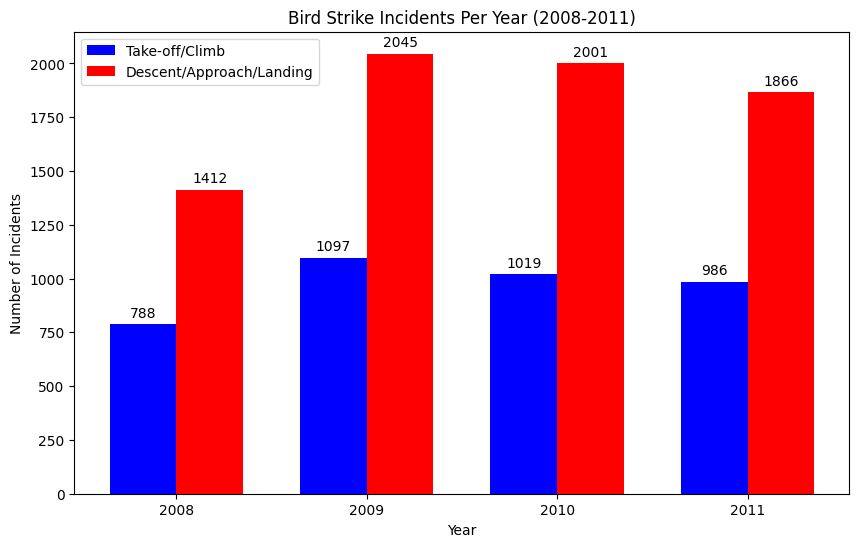

In [ ]:
# Merge the dataframes for easier plotting
df_combined = pd.merge(df_takeoff_climb, df_descent_landing, on='year', suffixes=('_takeoff', '_descent'))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and positions
bar_width = 0.35
index = range(len(df_combined))

# Plot the data for take-off/climb incidents
bars1 = ax.bar(index, df_combined['incident_count_takeoff'], bar_width, label='Take-off/Climb', color='b')

# Plot the data for descent/approach/landing incidents
bars2 = ax.bar([i + bar_width for i in index], df_combined['incident_count_descent'], bar_width, label='Descent/Approach/Landing', color='r')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Incidents')
ax.set_title('Bird Strike Incidents Per Year (2008-2011)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df_combined['year'])
ax.legend()

# Add data labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add data labels to both sets of bars
add_labels(bars1)
add_labels(bars2)

# Display the plot
plt.show()


**Conclusion:** <br>

From the chart, several trends can be observed regarding bird strike incidents during different flight phases from 2008 to 2011:

**1.Higher Incidents during Descent/Approach/Landing: The number of incidents during descent/approach/landing is consistently higher than during take-off/climb across all years.**

In order to find out the reasons behind this trend, we did some research further. We first calculate the average altitude of Descent/Approach/Landing group and take-off/climb group.

However, the following query result indicates that the average altitude during take-off/climb phases is approximately 586 feet. The average altitude during descent/approach/landing phases is even higher at approximately 1349 feet. This is contradicted by our perception.

In [ ]:
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

# Query to calculate the average altitude for each flight phase
query_avg_altitude = """
  SELECT
    CASE
    WHEN   sr.phase_of_flight IN ('Take-off run', 'Climb') THEN 'Take-off/Climb'
    WHEN   sr.phase_of_flight IN ('Descent', 'Approach', 'Landing') THEN 'Descent/Approach/Landing'
  END AS   flight_phase,
           AVG(sr.feet_above_ground) AS average_altitude
    FROM   strike_record sr
GROUP BY   flight_phase
  HAVING   flight_phase IS NOT NULL;
"""

# Execute the query and fetch the results
df_avg_altitude = pd.read_sql_query(query_avg_altitude, conn)

# Display the results
print(df_avg_altitude)

               flight_phase  average_altitude
0  Descent/Approach/Landing       1348.478878
1            Take-off/Climb        580.933682


We decided to analyse each phase in more detail.

**Bird Strike Incidents Proportion in a Year**

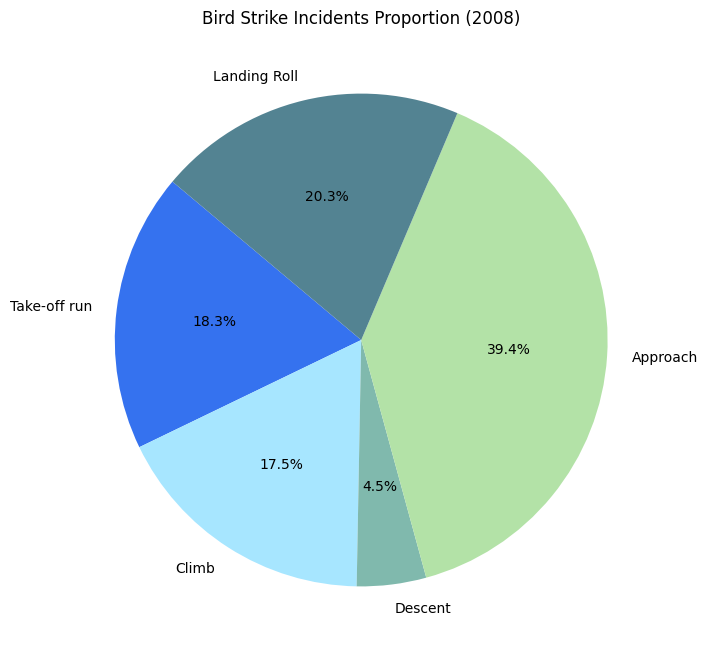

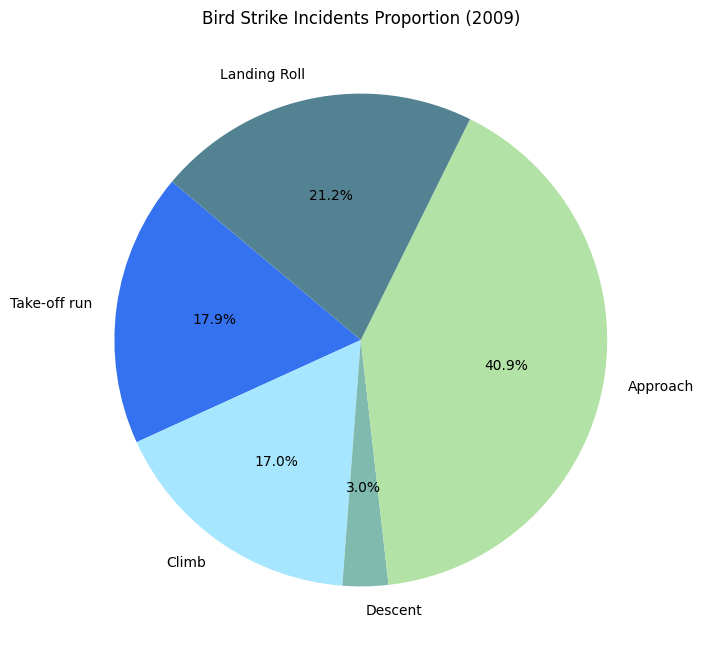

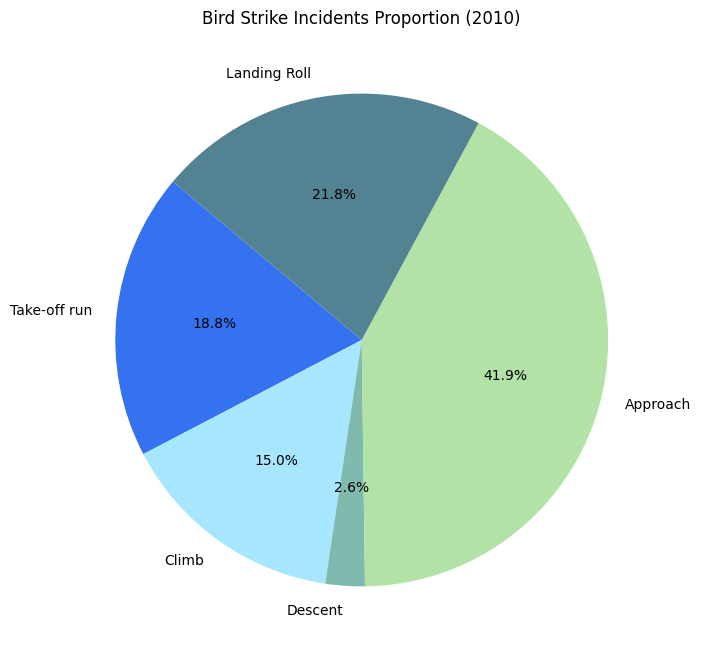

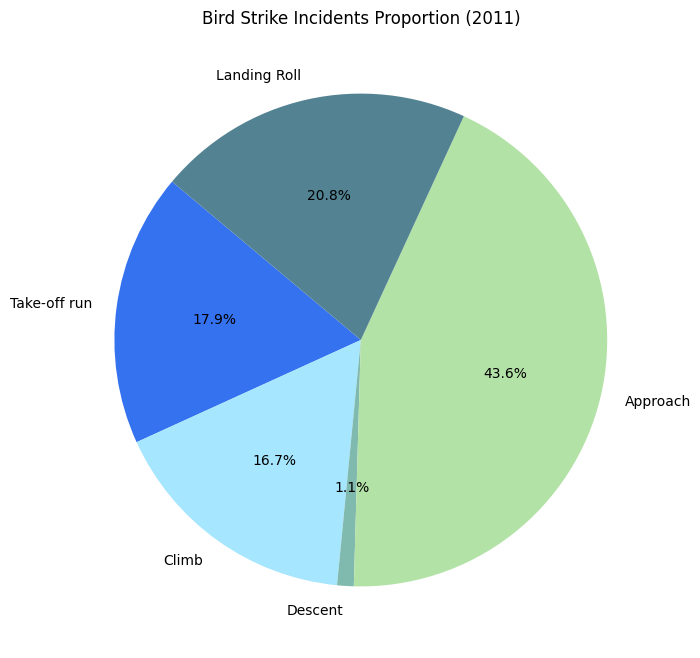

In [ ]:
# Ensure the phase_of_flight is displayed in the desired order
phase_order = ['Take-off run', 'Climb', 'Descent', 'Approach', 'Landing Roll']

# Function to plot pie chart for a specific year
def plot_pie_chart_for_year(year):
    df_year = df_result[df_result['year'] == year].set_index('phase_of_flight')
    df_year = df_year.reindex(phase_order).reset_index()

    sizes = df_year['incident_count']
    labels = df_year['phase_of_flight']
    # Custom colors for warm and cold phases
    colors = ['#3572EF', '#A7E6FF', '#80B9AD', '#B3E2A7', '#538392']

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Bird Strike Incidents Proportion ({year})')
    plt.show()

# Plot pie charts for all years in the dataset
unique_years = df_result['year'].unique()
for year in unique_years:
    plot_pie_chart_for_year(year)

We find that there's a huge difference inside the descent/approach/landing group. Approach phase accounts for a large percentage of the incidents, while descent phase only accounts for a small percentage of the incidents, but descent may level up the average altitude of the descent/approach/landing group.

Thus, we re-calculate the average altitude divided into specific phases. The query below shows that higher risk at Lower Altitudes.The approach phase, occurring at an average altitude of around 1005 feet, and the climb phase at around 1205 feet, are at altitudes where birds are more commonly found. This increases the likelihood of bird strikes. Also, there's a lower risk at higher altitudes. The descent phase, occurring at an average altitude of approximately 5927 feet, experiences fewer bird strikes likely due to the higher altitude where bird presence is less common.



The data of specific phases also give us insight that most of the incidents happens at or near the airport. From 2008 to 2011, each year more than 95% of the incidents happened at the take-off/climb/approach/landing phases, which are at or near the airport. It gives us insight that the importance of enhancing bird activity monitoring at the airport, and near approach paths and take-off zones, to predict and prevent potential bird strikes.


In [ ]:
# Query to calculate the average altitude for each individual flight phase
query_avg_altitude_each_phase = """
  SELECT   sr.phase_of_flight,
           AVG(sr.feet_above_ground) AS average_altitude
    FROM   strike_record sr
GROUP BY   sr.phase_of_flight
  HAVING   sr.phase_of_flight IN ('Take-off run', 'Climb', 'Descent', 'Approach', 'Landing Roll');
"""

# Execute the query and fetch the results
df_avg_altitude_each_phase = pd.read_sql_query(query_avg_altitude_each_phase, conn)

# Display the results
print(df_avg_altitude_each_phase)

  phase_of_flight  average_altitude
0        Approach       1004.757856
1           Climb       1204.828545
2         Descent       5927.366142
3    Landing Roll          0.000000
4    Take-off run          0.000000


 **2.Overall Trend in Incidents:
Both the take-off/climb group and the descent/approach/landing group show an increasing trend in incidents from 2008 to 2009, followed by a slight decrease from 2009 to 2011.**
As to specific phases within these groups,
the climb phase experienced an increase in incidents from 2010 to 2011.
The descent phase showed a decrease in incidents from 2008 to 2011.
This insight suggests that even within the same group, different phases demonstrate distinct trends. Therefore, further dividing the groups for deeper analysis can provide more valuable insights.
By analyzing the data more granularly, we can identify specific trends and factors affecting each phase, allowing for more targeted safety measures and strategies to mitigate bird strike risks effectively.

Bird Striks Trend graph

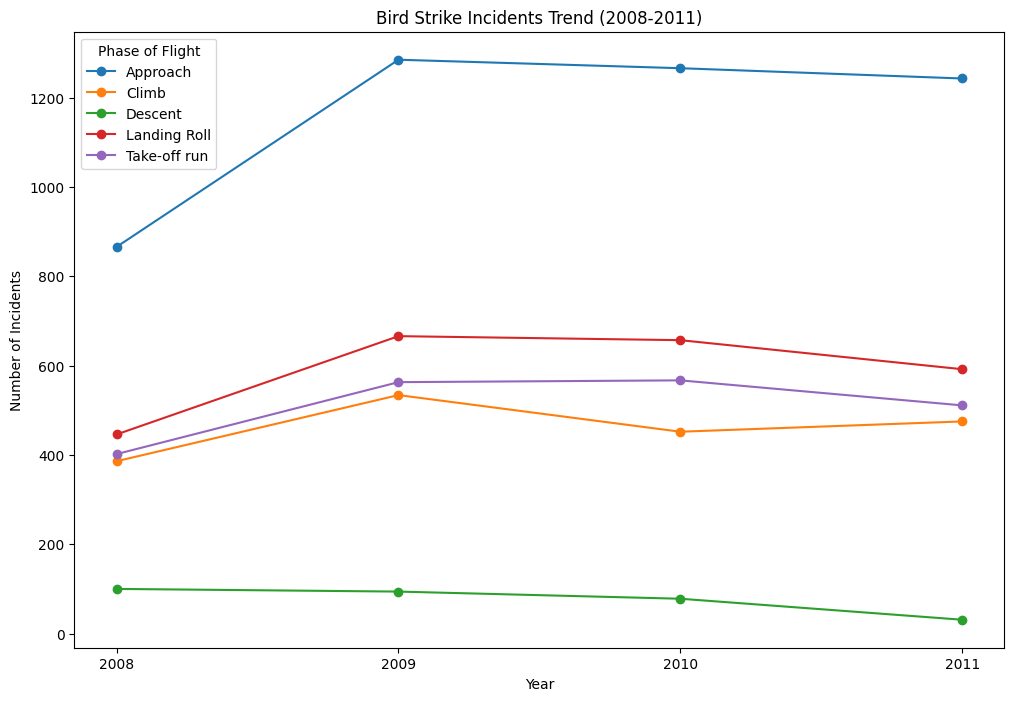

In [ ]:
import matplotlib.pyplot as plt

# Pivot the data to have years as rows and phases as columns
df_pivot = df_result.pivot(index='year', columns='phase_of_flight', values='incident_count').fillna(0)

# Plot the data using a line chart
fig, ax = plt.subplots(figsize=(12, 8))

for column in df_pivot.columns:
    ax.plot(df_pivot.index, df_pivot[column], marker='o', label=column)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Incidents')
ax.set_title('Bird Strike Incidents Trend (2008-2011)')
ax.legend(title='Phase of Flight')
plt.show()


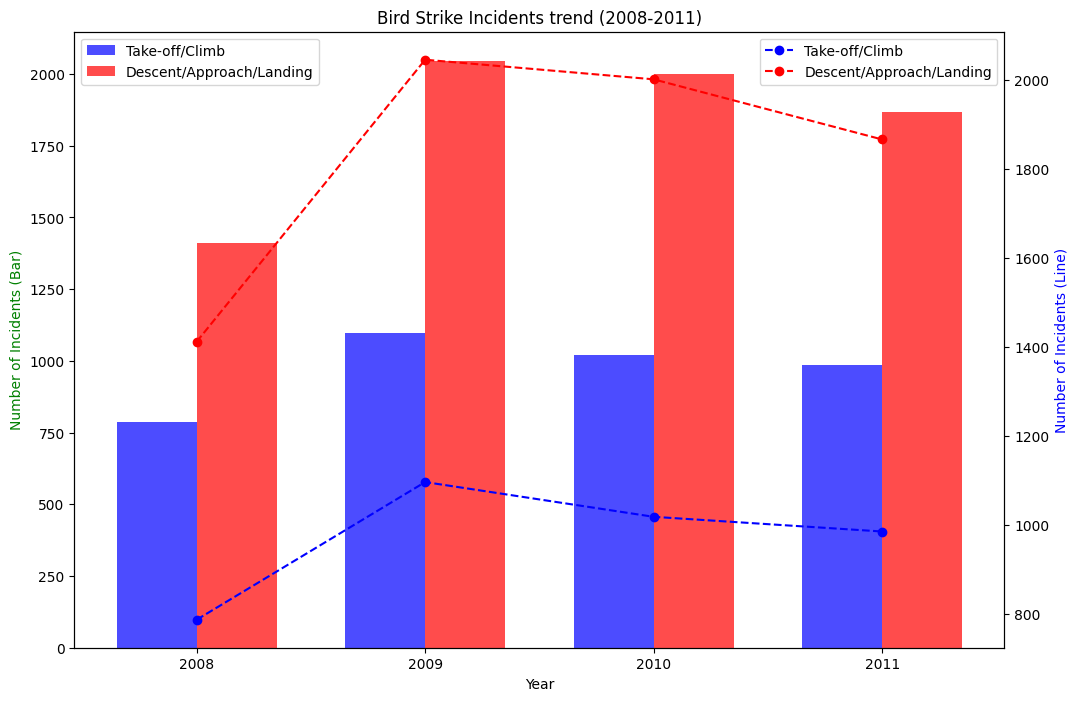

In [ ]:
# Create the combined bar and line chart
fig, ax1 = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = df_takeoff_climb['year'].astype(int)

# Plot the bar chart
bar1 = ax1.bar(index - bar_width/2, df_takeoff_climb['incident_count'], bar_width, label='Take-off/Climb', color='b', alpha=0.7)
bar2 = ax1.bar(index + bar_width/2, df_descent_landing['incident_count'], bar_width, label='Descent/Approach/Landing', color='r', alpha=0.7)

# Plot the line chart
ax2 = ax1.twinx()
ax2.plot(index, df_takeoff_climb['incident_count'], marker='o', label='Take-off/Climb', color='b', linestyle='--')
ax2.plot(index, df_descent_landing['incident_count'], marker='o', label='Descent/Approach/Landing', color='r', linestyle='--')

# Add labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Incidents (Bar)', color='g')
ax2.set_ylabel('Number of Incidents (Line)', color='b')
ax1.set_title('Bird Strike Incidents trend (2008-2011)')
ax1.set_xticks(index)
ax1.set_xticklabels(index)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add data labels
for bar in bar1:
    height = bar.get_height()
    ax1.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', color='white')

for bar in bar2:
    height = bar.get_height()
    ax1.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', color='white')

# Display the plot
plt.show()